Dataset loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


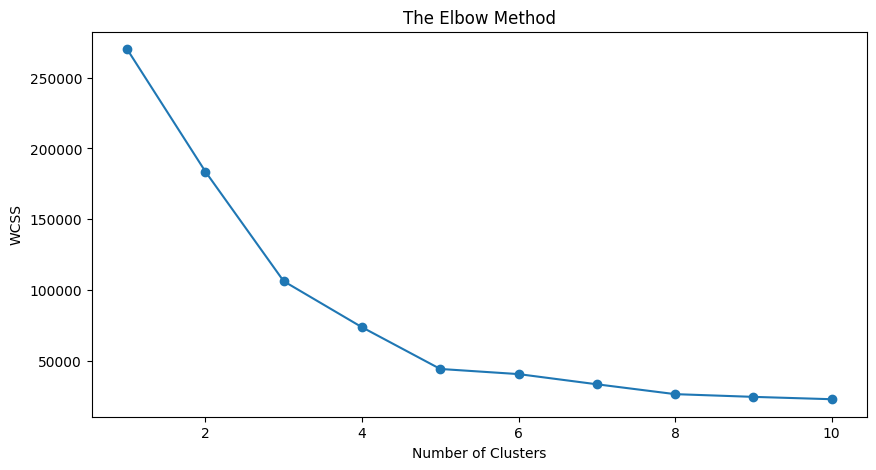

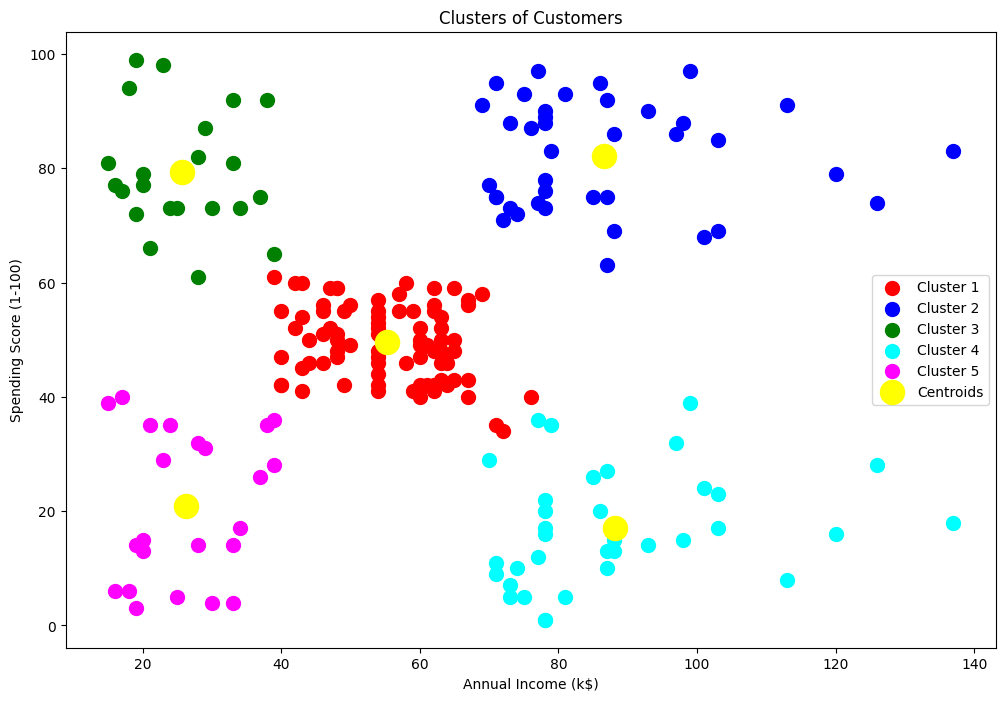

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ---------------------------------------------------------
# STEP 1: LOAD DATA
# ---------------------------------------------------------
# Load the 'Mall_Customers.csv' directly from a GitHub repository
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
data = pd.read_csv(url)

print("Dataset loaded successfully!")
print(data.head())

# ---------------------------------------------------------
# STEP 2: SELECT FEATURES
# ---------------------------------------------------------
# We will use 'Annual Income' and 'Spending Score' for clustering
# This allows us to visualize the clusters in a 2D graph easily.
X = data.iloc[:, [3, 4]].values

# ---------------------------------------------------------
# STEP 3: FIND OPTIMAL 'K' (ELBOW METHOD)
# ---------------------------------------------------------
# We need to find how many clusters (groups) are best for this data.
wcss = [] # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# NOTE: The "Elbow" of the graph above usually appears at K=5.
# This means 5 is the optimal number of groups.

# ---------------------------------------------------------
# STEP 4: TRAIN THE MODEL (K-Means)
# ---------------------------------------------------------
# Based on the Elbow graph, we choose 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# ---------------------------------------------------------
# STEP 5: VISUALIZE THE CLUSTERS
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# Plot each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()